In [1]:
# Assignment 3 - Javier Aramayo
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# Reading whale returns

whale_csv_path = Path('C:/Users/fizza/Desktop/assignment 4 data/whale_returns.csv')
whale_df = pd.read_csv(whale_csv_path)

# Set the date as teh index to the Dataframe
whale_df['Date'] = pd.to_datetime(whale_df['Date'])
whale_df = whale_df.set_index(['Date'])
# Sort datetime index in ascending order (past to present)
whale_df.sort_index(inplace=True)

whale_df.head()
#whale_df.tail()
    # Daily returns for 4 tickers, returns in float64, date starts on 2015-03-02, ending 2019-05-01

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# checking the data types
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna().copy()

In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Reading algorithmic returns

algo_csv_path = Path('C:/Users/fizza/Desktop/assignment 4 data/algo_returns.csv')

# Read the CSVs into DataFrames

algo_df = pd.read_csv(algo_csv_path)

# Set the date as teh index to the Dataframe
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
algo_df = algo_df.set_index(['Date'])

# Sort datetime index in ascending order (past to present)
algo_df.sort_index(inplace=True)

algo_df.head(10)
#algo_df.tail()
    # Daily returns for two Algos, returns in float64, date starts on 2014-05-28 Algo1, 2014-06-05 Algo2
    # ending date is 2019-05-01 for both algos

# checking the data types
#algo_df.dtypes

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls

algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
# Reading S&P TSX 60 Closing Prices
sptsx60_csv_path = Path('C:/Users/fizza/Desktop/assignment 4 data/sp_tsx_history.csv')
sptsx60_df = pd.read_csv(sptsx60_csv_path)

# Set the date as teh index to the Dataframe
#sptsx60_df = sptsx60_df.set_index(['Date'])

# Sort datetime index in ascending order (past to present)
#sptsx60_df.sort_index(inplace=True)

sptsx60_df.head()
#sptsx60_df.tail()
    # Closing price data in object data type with $ sign, the date format is 1-oct-2012, ending 30-dec-2019
#sptsx60_df.isnull().sum()

,Date,Close
0,01-Oct-12,"$12,370.19"
1,02-Oct-12,"$12,391.23"
2,03-Oct-12,"$12,359.47"
3,04-Oct-12,"$12,447.68"
4,05-Oct-12,"$12,418.99"


In [11]:
# Check Data Types
sptsx60_df.dtypes

Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types
sptsx60_dfV2 = sptsx60_df.copy()
sptsx60_dfV2['Date'] = pd.to_datetime(sptsx60_dfV2['Date'])
sptsx60_dfV2 = sptsx60_dfV2.set_index(['Date'])
#sptsx60_df.head()
sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].str.replace("$", "")
sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].str.replace(",", "")
#sptsx60_df.head()
sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].astype('float')

sptsx60_dfV2.dtypes

C:\Users\fizza\AppData\Local\Temp\ipykernel_8420\201677175.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].str.replace("$", "")


Close    float64
dtype: object

In [13]:
sptsx60_dfV2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [14]:
# Calculate Daily Returns
d_returns_tsx60 = sptsx60_dfV2.pct_change()
d_returns_tsx60.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
d_returns_tsx60.isnull().sum()
d_returns_tsx60 = d_returns_tsx60.dropna().copy()

In [16]:
d_returns_tsx60.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename `Close` Column to be specific to this portfolio.
d_returns_tsx60 = d_returns_tsx60.rename(columns={"Close": "SP_TSX60"})
d_returns_tsx60.head()

,SP_TSX60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_WAT = pd.concat([whale_df, algo_df, d_returns_tsx60], axis="columns", join="inner")

combined_WAT.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


In [19]:
whale_df.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1059, freq=None)

<AxesSubplot:xlabel='Date'>

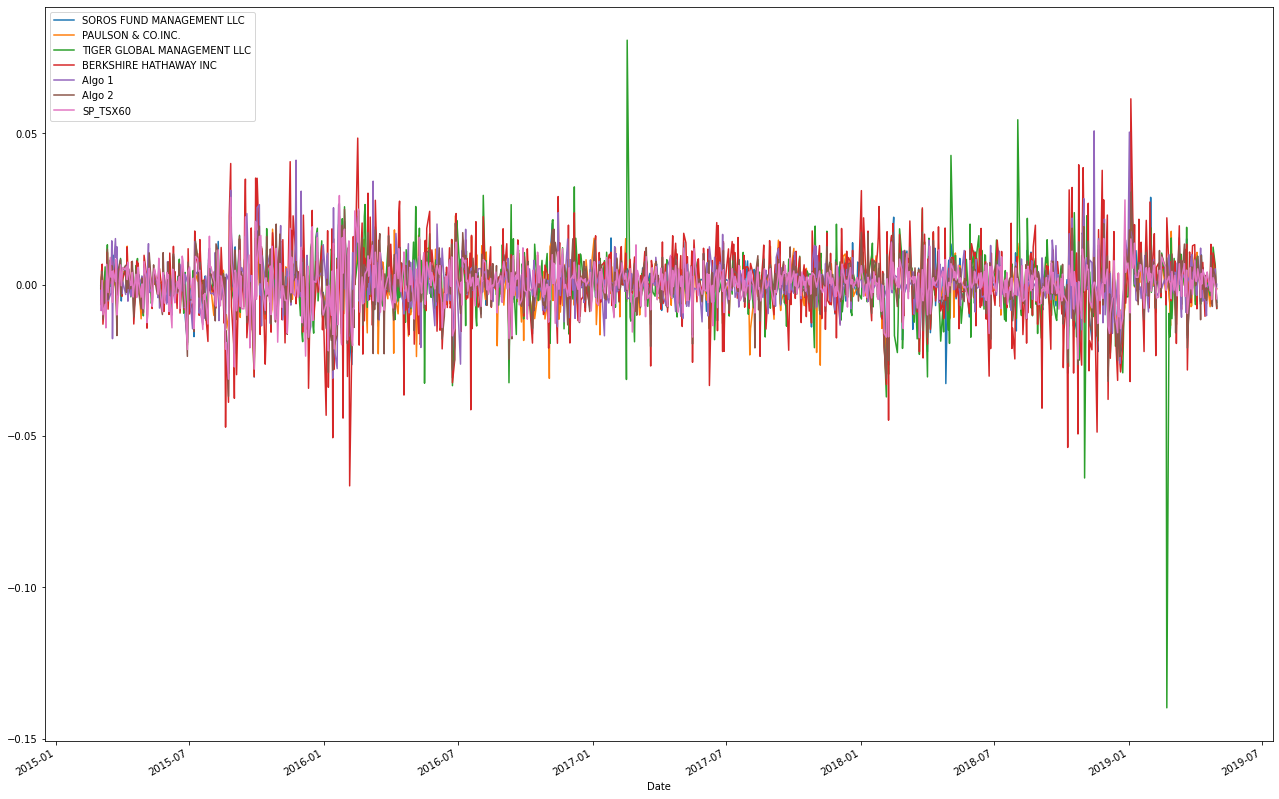

In [20]:
# Plot daily returns of all portfolios
combined_WAT.plot(figsize = (22, 15))

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

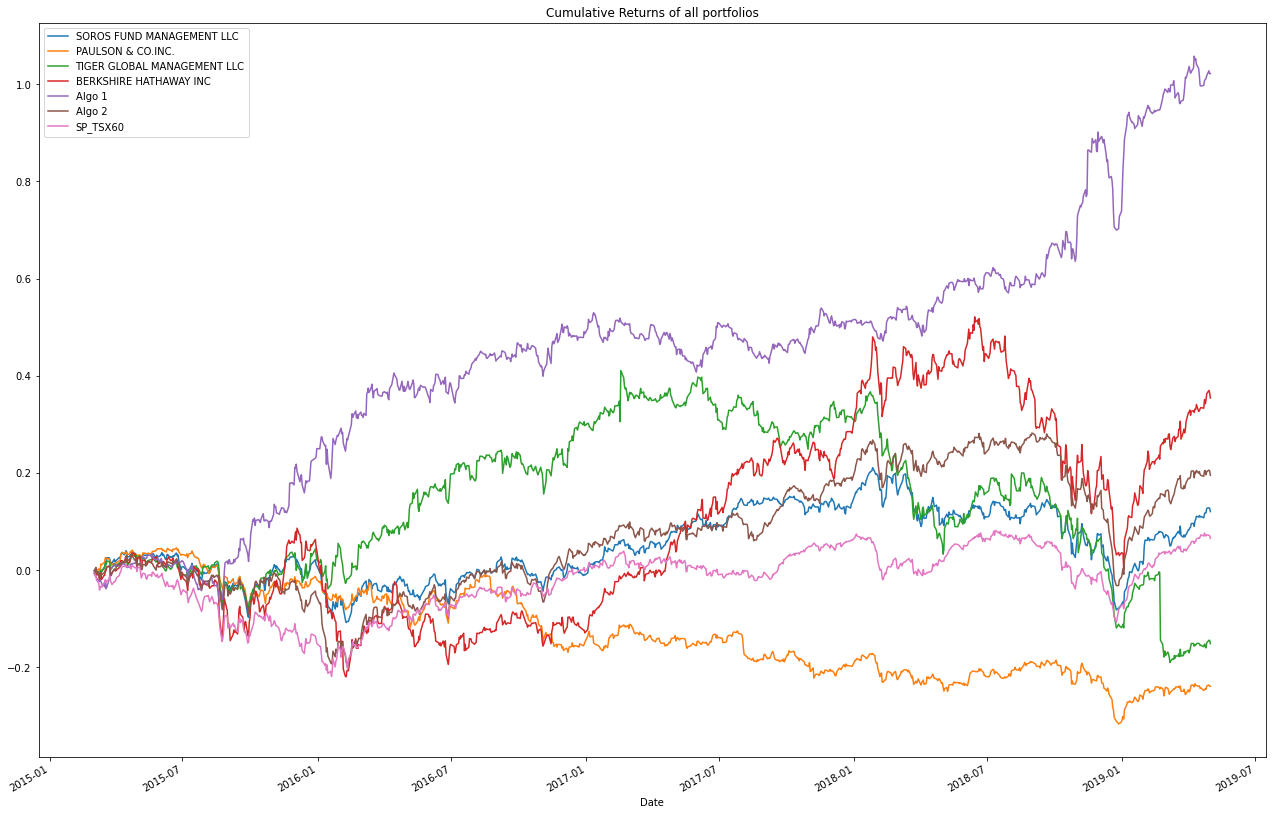

In [21]:
# Calculate cumulative returns of all portfolios

cumu_combined_WAT = (1 + combined_WAT).cumprod() - 1
cumu_combined_WAT

# Plot cumulative returns

cumu_combined_WAT.plot(figsize = (22, 15), title="Cumulative Returns of all portfolios")

<AxesSubplot:title={'center':'Risk Analysis - Cumulative Returns'}>

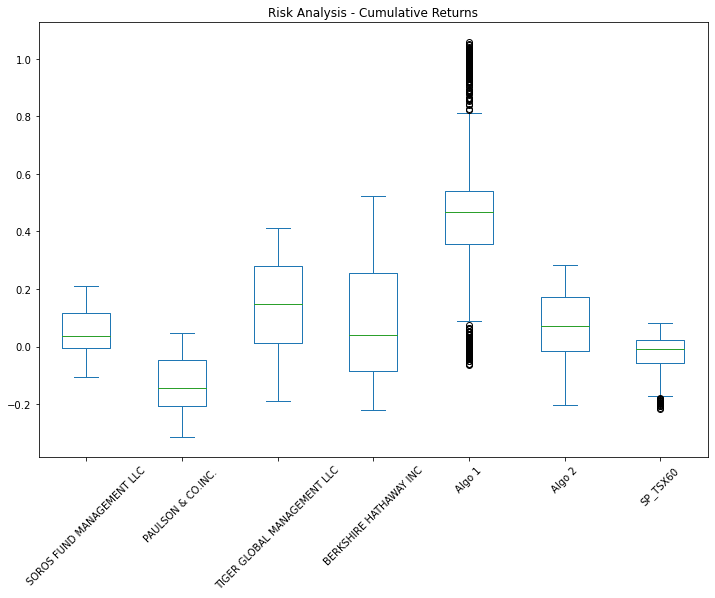

In [22]:
# Box plot to visually show risk
cumu_combined_WAT.plot.box(figsize = (12, 8), title="Risk Analysis - Cumulative Returns", rot=45)

<AxesSubplot:title={'center':'Risk Analysis - Daily Returns'}>

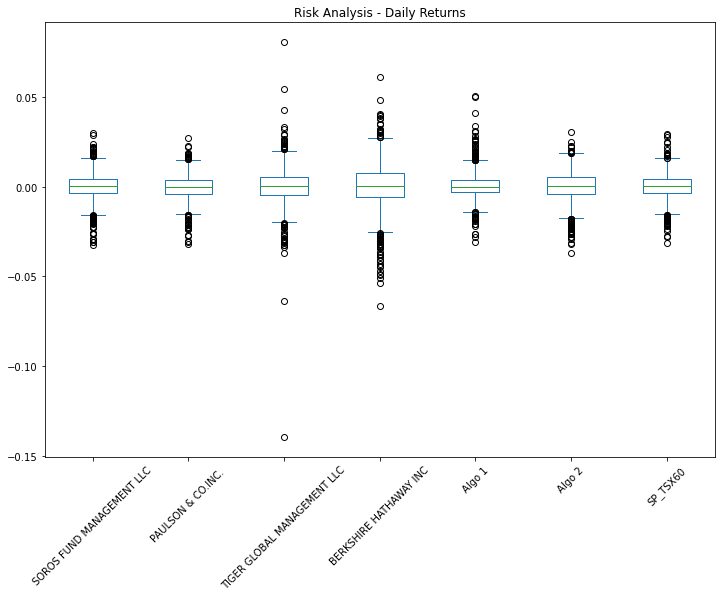

In [23]:
# Box plot to visually show risk
combined_WAT.plot.box(figsize = (12, 8), title="Risk Analysis - Daily Returns", rot=45)

In [24]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_WAT.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX60                       0.007034
dtype: float64

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std = combined_WAT.std()
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values()
daily_std

#Answer: All the portfolios but Paulson & CO.INC. are riskier(more volatile) than the SP_TSX60,
# because their standard deviations are higher than of the SP-TSX60

PAULSON & CO.INC.              0.006982
SP_TSX60                       0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_daily_std = combined_WAT.std() * np.sqrt(252)
annual_daily_std = annual_daily_std.sort_values()
annual_daily_std

PAULSON & CO.INC.              0.110841
SP_TSX60                       0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

<AxesSubplot:title={'center':'21-day Rolling std, daily returns'}, xlabel='Date'>

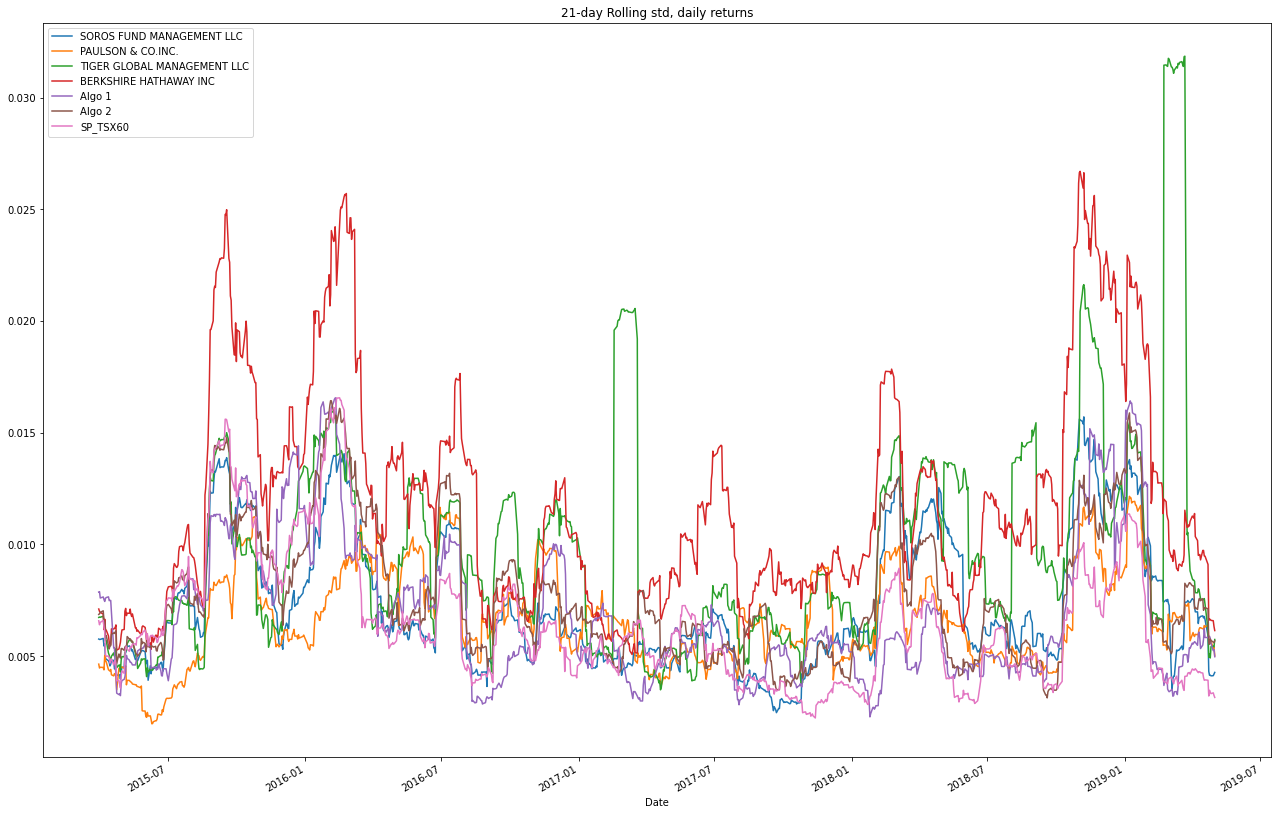

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_roll_21 = combined_WAT.rolling(window=21).std()
std_roll_21

# Plot the rolling standard deviation
std_roll_21.plot(figsize = (22, 15), title="21-day Rolling std, daily returns")

In [28]:
# Calculate the correlation
correlation_all_portf = combined_WAT.corr()
# Display de correlation matrix
correlation_all_portf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_TSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [29]:
# Use `ewm` to calculate the rolling window
ewm_roll_21 = combined_WAT.ewm(com=0)
ewm_roll_21


ExponentialMovingWindow [com=0,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios_all = (combined_WAT.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios_all

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
SOROS FUND MANAGEMENT LLC      0.286709
SP_TSX60                       0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios all portfolios'}>

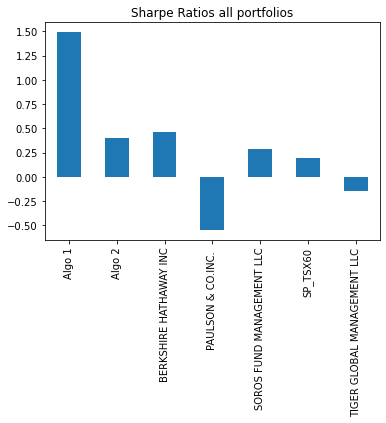

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot.bar(title="Sharpe Ratios all portfolios")

--- Answer: When considering the sharpe ratio; the two algorithms(Algo1, Algo2) outperformed the S&P TSX 60. The Algo1 outperformed all of the whales portofiols, and Algo 2 outperformed all but one portfolio - The Berkshire Hathaway.

In [32]:
# Reading data from 1st stock
otex_csv_path = Path("C:/Users/fizza/Downloads/otex_historical (1).csv")
otex_df = pd.read_csv(otex_csv_path)

# Fix Data Types
#tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
otex_df["Date"] = otex_df["Date"].str.replace(" 16:00:00", "")
otex_df['Date'] = pd.to_datetime(otex_df['Date'])
otex_df = otex_df.set_index(['Date'])


#sptsx60_dfV2["Close"] = sptsx60_dfV2["Close"].astype('float')

#tsla_df.dtypes

otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [33]:
# Reading data from 2nd stock
I_csv_path = Path("C:/Users/fizza/Downloads/l_historical (1).csv")
I_df = pd.read_csv(I_csv_path)
I_df["Date"] = I_df["Date"].str.replace(" 16:00:00", "")
I_df['Date'] = pd.to_datetime(I_df['Date'])
I_df = I_df.set_index(['Date'])

I_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [34]:
# Reading data from 3rd stock
shop_csv_path = Path("C:/Users/fizza/Downloads/shop_historical (1).csv")
shop_df = pd.read_csv(shop_csv_path)
shop_df["Date"] = shop_df["Date"].str.replace(" 16:00:00", "")
shop_df['Date'] = pd.to_datetime(shop_df['Date'])
shop_df = shop_df.set_index(['Date'])

shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [35]:
# Combine all stocks in a single DataFrame
my_portf = pd.concat([otex_df, I_df, shop_df], axis="columns", join="inner")
my_portf

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,L,57.99,SHOP,132.06
2018-01-03,OTEX,43.07,L,57.41,SHOP,135.15
2018-01-04,OTEX,42.91,L,57.42,SHOP,137.46
2018-01-05,OTEX,42.57,L,57.42,SHOP,137.26
2018-01-08,OTEX,42.16,L,56.86,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,OTEX,58.68,L,67.90,SHOP,513.22
2019-12-23,OTEX,57.89,L,67.68,SHOP,511.62
2019-12-24,OTEX,57.44,L,67.67,SHOP,525.39


In [36]:
# Reset Date index
my_portf = pd.concat([otex_df, I_df, shop_df], axis="columns", join="inner")
my_portf
# Sort datetime index in ascending order (past to present)
#whale_df.sort_index(inplace=True)

#whale_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,L,57.99,SHOP,132.06
2018-01-03,OTEX,43.07,L,57.41,SHOP,135.15
2018-01-04,OTEX,42.91,L,57.42,SHOP,137.46
2018-01-05,OTEX,42.57,L,57.42,SHOP,137.26
2018-01-08,OTEX,42.16,L,56.86,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,OTEX,58.68,L,67.90,SHOP,513.22
2019-12-23,OTEX,57.89,L,67.68,SHOP,511.62
2019-12-24,OTEX,57.44,L,67.67,SHOP,525.39


In [37]:
# Reorganize portfolio data by having a column per symbol
my_portf = pd.concat([otex_df, I_df, shop_df], axis="columns", join="inner")
my_portf

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,L,57.99,SHOP,132.06
2018-01-03,OTEX,43.07,L,57.41,SHOP,135.15
2018-01-04,OTEX,42.91,L,57.42,SHOP,137.46
2018-01-05,OTEX,42.57,L,57.42,SHOP,137.26
2018-01-08,OTEX,42.16,L,56.86,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,OTEX,58.68,L,67.90,SHOP,513.22
2019-12-23,OTEX,57.89,L,67.68,SHOP,511.62
2019-12-24,OTEX,57.44,L,67.67,SHOP,525.39
